In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pandas as pd
import time
import lightgbm as lgb

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
data = pd.read_csv('/content/MyDrive/MyDrive/projects/Albedo/albedo_df_updated.csv')
df = data.drop('AL2', axis=1)

In [ ]:
# 10% of data

df_10p = df.sample(frac=0.1)

In [ ]:
df.head(5)

,LWN,ST2,ME,SWD,RF,SF,SHF,LHF,SP,CD,CM,TT,QQ,UU,VV,albedo
0,-72.722000,-1.441925,31.091021,321.971558,1.477201e-03,0.000000e+00,28.755768,-18.186138,958.125793,0.000217,0.012455,4.917992,3.189087,-1.309971,2.412317,47.0
1,-75.489471,-1.726056,20.917885,338.063568,6.715262e-05,3.687320e-07,55.636593,-52.156727,988.829651,0.066936,0.091493,0.983965,2.729851,3.445704,0.570313,56.0
2,-28.299072,-3.013611,-0.000000,152.537247,5.159156e-05,2.155155e+00,-0.950678,-52.996662,957.029785,0.918136,0.742793,-2.290780,2.527486,-4.836516,-5.375922,75.0
3,-33.994049,-1.813703,4.366425,232.480637,6.445825e-07,2.404408e-01,-6.710862,-38.557491,932.894592,0.689475,1.000000,-1.609589,2.116926,-0.203870,-2.054283,46.0
4,-41.142273,-2.935536,-0.000000,238.158371,1.137988e-06,2.512345e-01,-24.023888,-24.586668,932.433533,0.681241,1.000000,-1.458742,2.058762,-1.058693,-1.459658,43.0


In [ ]:
# features and target 
X_10p = df.drop(['albedo'], axis=1)
y_10p = df[['albedo']]

# feature preprocess remove 10p label - whole dataset
X_10p.loc[X_10p.ME<1e-10,'ME'] = 1e-10
X_10p.loc[X_10p.RF<1e-10,'RF'] = 1e-10
X_10p.loc[X_10p.SF<1e-10,'SF'] = 1e-10
X_10p.loc[X_10p.CD<1e-10,'CD'] = 1e-10
X_10p.loc[X_10p.CM<1e-10,'CM'] = 1e-10
X_10p.ME = np.log(X_10p.ME)
X_10p.RF = np.log(X_10p.RF)
X_10p.SF = np.log(X_10p.SF)
X_10p.SF = np.log(X_10p.CD)
X_10p.SF = np.log(X_10p.CM)

In [ ]:
train_size = int(df.shape[0]*0.8)

X_train =X_10p.iloc[:train_size,:]
y_train = y_10p.iloc[:train_size]
X_test =X_10p.iloc[train_size:,:]
y_test = y_10p.iloc[train_size:]


In [ ]:
# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
minmax = MinMaxScaler()
y_train = pd.Series(minmax.fit_transform(pd.DataFrame(y_train)).reshape(1,-1)[0])
y_test = pd.Series(minmax.transform(pd.DataFrame(y_test)).reshape(1,-1)[0])

In [ ]:
# train test splitting 
#X_train, X_test, y_train, y_test= train_test_split(X_10p, y_10p, test_size=0.2)

In [ ]:
print('total feature training features: ', len(X_train))
print('total feature testing features: ', len(X_test))
print('total target training features: ', len(y_train))
print('total target testing features: ', len(y_test))

total feature training features:  1085076
total feature testing features:  271270
total target training features:  1085076
total target testing features:  271270


In [ ]:
# feature importance
'''
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)
'''

'\ntrain_data = lgb.Dataset(X_train, label=y_train)\ntest_data = lgb.Dataset(X_test, label=y_test)\n'

In [ ]:
# basic params
'''
params = {
    'objective': 'regression',
    'metric': 'auc',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}
'''

"\nparams = {\n    'objective': 'regression',\n    'metric': 'auc',\n    'boosting': 'gbdt',\n    'num_leaves': 31,\n    'feature_fraction': 0.5,\n    'bagging_fraction': 0.5,\n    'bagging_freq': 20,\n    'learning_rate': 0.05,\n    'verbose': 0\n}\n"

In [ ]:
# fit and run test
'''
model = lgb.train(params,
                  train_data,
                  valid_sets=test_data,
                  num_boost_round=5000,
                  early_stopping_rounds=100)
                  '''

'\nmodel = lgb.train(params,\n                  train_data,\n                  valid_sets=test_data,\n                  num_boost_round=5000,\n                  early_stopping_rounds=100)\n                  '

In [ ]:
#ax = lgb.plot_importance(model, max_num_features=5, figsize=(10,6))
#plt.show()

In [ ]:
# most weighted features
'''
QQ,
SWD,
TT,
LWN,
SF
'''

'\nQQ,\nSWD,\nTT,\nLWN,\nSF\n\n'

In [ ]:
start = time.time()
lgb_params = {'max_depth': [-1,1,2],
              'n_estimators': [10, 30, 100, 150, 200],
              'learning_rate': [0.01, 0.1, 1],
              "gamma": uniform()}
        
lgb_rscv = RandomizedSearchCV(estimator=lgb.LGBMRegressor(objective = 'regression',seed=27),
                              param_distributions = lgb_params, cv=10,random_state=42, n_iter=10)

lgb_rscv.fit(X_train, y_train)
finish = time.time()

print('Random Search fitting time: ', finish-start)
print("Best paramters and score:", lgb_rscv.best_params_,lgb_rscv.best_score_)

Random Search fitting time:  712.8146286010742
Best paramters and score: {'gamma': 0.15599452033620265, 'learning_rate': 1, 'max_depth': 2, 'n_estimators': 200} 0.29962650684521497


In [ ]:
# retrieve best parameters
LGBM = LGBMRegressor(gamma = lgb_rscv.best_params_['gamma'], learning_rate = lgb_rscv.best_params_['learning_rate'],
                     max_depth = lgb_rscv.best_params_['max_depth'], n_estimators = lgb_rscv.best_params_['n_estimators'],
                     objective = 'regression',seed=27)

LGBM.fit(X_train,y_train)

LGBMRegressor(gamma=0.15599452033620265, learning_rate=1, max_depth=2,
              n_estimators=200, objective='regression', seed=27)

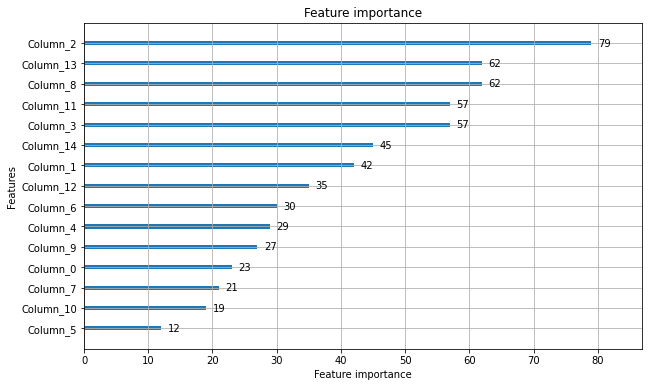

In [ ]:
ax = lgb.plot_importance(LGBM, max_num_features=16, figsize=(10,6))
plt.show()

Text(0.5, 1.0, 'LightGBM Feature Importance')

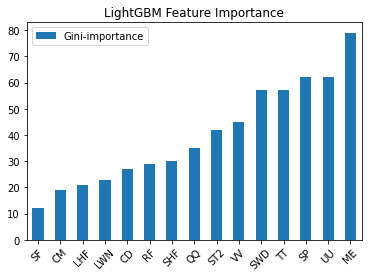

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, LGBM.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45).set_title('LightGBM Feature Importance')

In [ ]:
# predictions
lgb_y_train_pred = LGBM.predict(X_train)
lgb_y_test_pred = LGBM.predict(X_test)

print('lgb r-sq',LGBM.score(X_train,y_train))
print('lgb test r-sq',LGBM.score(X_test,y_test))

lgb r-sq 0.3258226795116117
lgb test r-sq 0.2838549188706231
